In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
# plt.style.use("dark_background")
plt.style.use("ggplot")
plt.rc('font', family='Malgun Gothic')
pd.set_option('display.max_columns', None)

In [86]:
dataset = pd.read_excel("영화 데이터.xlsx")
dataset.shape

(40940, 18)

In [87]:
# 누적관객수, 스크린수, 상영횟수 1이하 데이터 제거 (없는 데이터가 많음)
dataset.drop(dataset[(dataset['누적관객수']<=1) & (dataset['스크린수']<=1) & (dataset['상영횟수']<=1)].index, inplace=True)

In [88]:
# 누적매출액이 0인 데이터 제거 (마찬가지로 없는 데이터가 많음)
dataset.drop(dataset[dataset['누적매출액'] == 0].index, inplace=True)

In [89]:
dataset.shape

(32040, 18)

In [90]:
# 영화 개봉 후 발생하는 데이터 제거
dataset = dataset.drop(['순위', '매출액', '점유율', '관객수', '누적관객수', '스크린수', '상영횟수', '국적'], axis=1)

In [91]:
dataset.dtypes

영화명              object
개봉일      datetime64[ns]
누적매출액             int64
대표국적             object
제작사              object
배급사              object
등급               object
장르               object
감독               object
배우               object
dtype: object

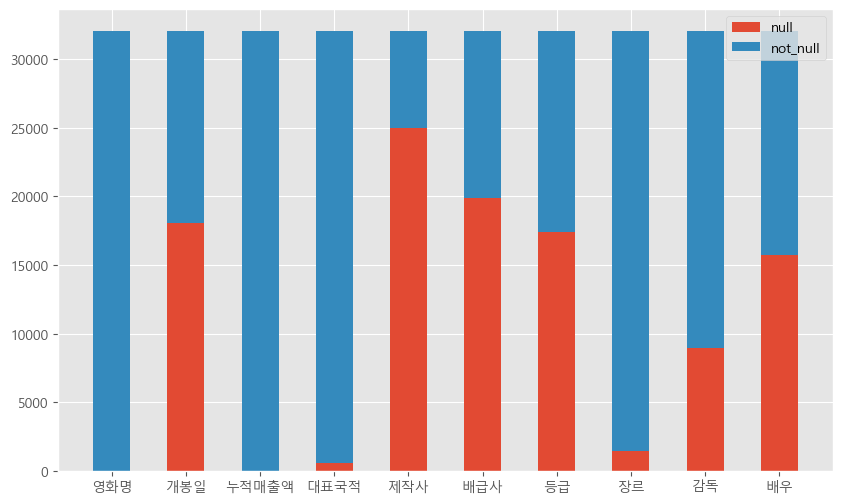

In [92]:
# 결측치 비교

null = dataset.isnull().sum()
not_null = dataset.notnull().sum()

plt.figure(figsize=(10, 6))
plt.bar(dataset.columns, null, label='null', width=0.5)
plt.bar(dataset.columns, not_null, label='not_null', width=0.5, bottom=null)
plt.legend()

In [93]:
df = dataset.copy()
df.shape

(32040, 10)

<Axes: xlabel='대표국적'>

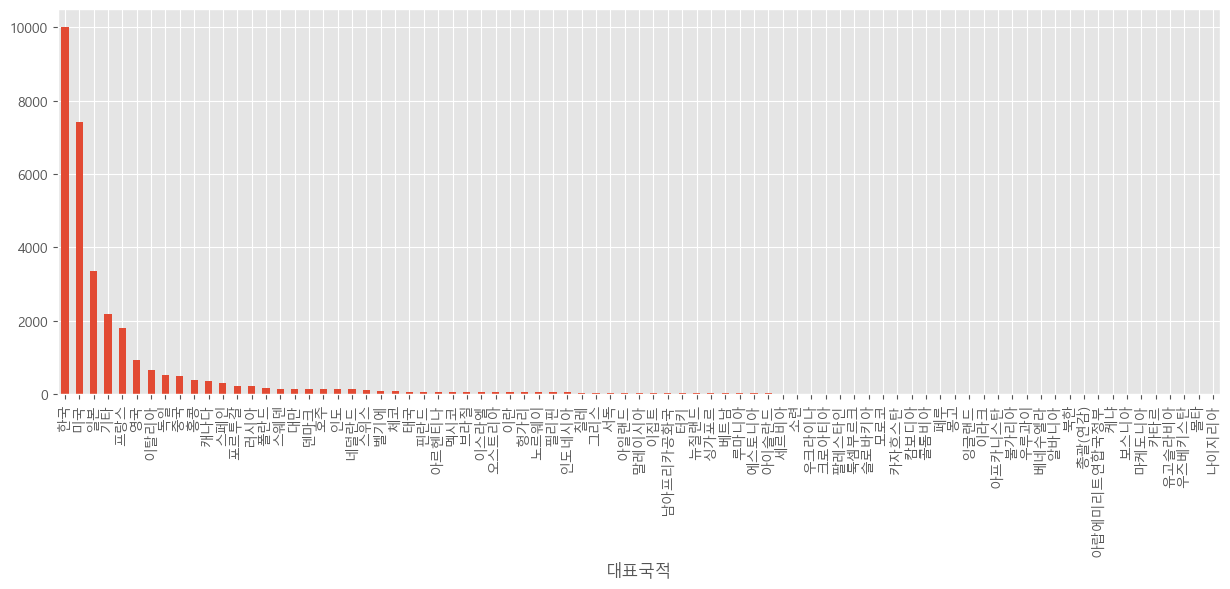

In [94]:
# 대표국적은 한국, 미국, 일본이 대부분을 차지

plt.figure(figsize=(15, 5))
df['대표국적'].value_counts().plot(kind='bar')

In [95]:
# 한국, 미국, 일본, 프랑스, 영국 외 국적은 기타로 처리 (top5 국적)

df['대표국적'][~df['대표국적'].isin(['한국', '미국', '일본', '프랑스', '영국'])] = '기타'

C:\Users\USER\AppData\Local\Temp\ipykernel_6136\289791037.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['대표국적'][~df['대표국적'].isin(['한국', '미국', '일본', '프랑스', '영국'])] = '기타'
C:\Users\USER\AppData\Local\Temp\ipykernel_6136\289791037.py:3

<Axes: xlabel='대표국적'>

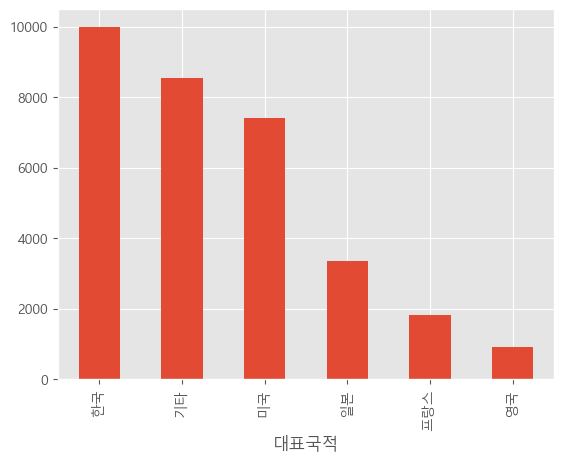

In [96]:
df['대표국적'].value_counts().plot(kind='bar')

In [97]:
# 관람 등급 1개만 남김
df['등급'] = df['등급'].str.split(',').str[0]
print(df['등급'].unique())

# 같은 등급이지만 다르게 적힌 등급을 통일
# 전체관람가 = 0
# 12세 이상 관람가 = 12
# 15세 이상 관감가 = 15
# 청소년 관람불가 = 18
# 결측치 = -1

df['등급'][df['등급'].isin(['전체관람가', '연소자관람가', '미성년자관람가', '모든 관람객이 관람할 수 있는 등급', '기타', '미정'])] = 0
df['등급'][df['등급'].isin(['12세관람가', '12세이상관람가', '중학생이상관람가', '12세 미만인 자는 관람할 수 없는 등급', '국민학생관람불가'])] = 12
df['등급'][df['등급'].isin(['15세관람가', '15세이상관람가', '고등학생이상관람가', '15세 미만인 자는 관람할 수 없는 등급'])] = 15
df['등급'][df['등급'].isin(['18세관람가', '청소년관람불가', '18세 미만인 자는 관람할 수 없는 등급', '미성년자관람불가', '연소자관람불가'])] = 18
df['등급'].fillna(-1, inplace=True)
df['등급'] = df['등급'].astype(int)

['15세관람가' '12세관람가' '전체관람가' '12세이상관람가' '18세관람가' nan '고등학생이상관람가' '연소자관람불가'
 '15세이상관람가' '청소년관람불가' '연소자관람가' '18세 미만인 자는 관람할 수 없는 등급'
 '15세 미만인 자는 관람할 수 없는 등급' '중학생이상관람가' '기타' '모든 관람객이 관람할 수 있는 등급'
 '12세 미만인 자는 관람할 수 없는 등급' '국민학생관람불가' '미성년자관람불가' '미정' '미성년자관람가']


C:\Users\USER\AppData\Local\Temp\ipykernel_6136\3535945008.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['등급'][df['등급'].isin(['전체관람가', '연소자관람가', '미성년자관람가', '모든 관람객이 관람할 수 있는 등급', '기타', '미정'])] = 0
C:\Users\USER\AppData\Local\Temp\i

<Axes: xlabel='등급'>

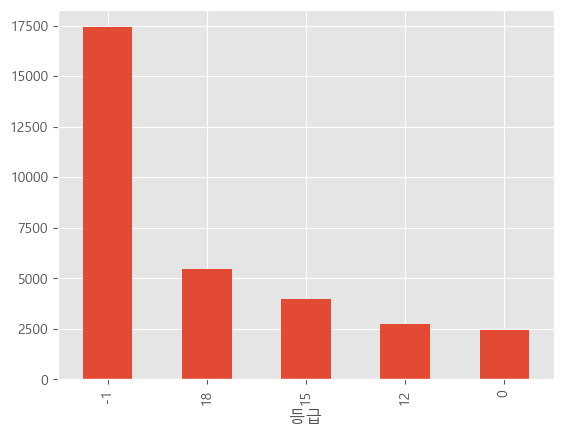

In [98]:
# 등급 분포
df['등급'].value_counts().plot(kind='bar')

In [ ]:
from sklearn.preprocessing import LabelEncoder
import holidays

# 제작사 결측치가 대부분이라서 삭제
df = df.drop(['제작사'], axis=1)

# 배우 3명까지만 새로운 열로 추가하고 기존 배우 열 삭제
for i in range(1, 4):
    df[f'배우{i}'] = df['배우'].str.split(',').str[i - 1]
df.drop(['배우'], axis=1, inplace=True)

# 원-핫 인코딩, 장르를 더미변수로 생성하고 기존 장르 열 삭제
genre = df['장르'].str.get_dummies(sep=',')
df = pd.concat([df, genre], axis=1)
df.drop(['장르'], axis=1, inplace=True)

# 감독 1명만 남김
df['감독'] = df['감독'].str.split(',').str[0]

# 배급사 1개만 남김
df['배급사'] = df['배급사'].str.split(',').str[0]

# 개봉일 결측치
df['개봉일'].fillna('1900-01-01', inplace=True)

# 개봉일을 년 / 월 / 일 / 요일로 분리하고 기존 개봉일 열 삭제
df['년'] = df['개봉일'].dt.year
df['월'] = df['개봉일'].dt.month
df['일'] = df['개봉일'].dt.day
df['요일'] = df['개봉일'].dt.weekday    # 0 = 월요일 ~

# 한국 공휴일 or 주말 = 1, 아니면 0
kr_holidays = holidays.KR() 
df['휴일'] = df['개봉일'].apply(lambda x: 1 if (x.weekday() in [5, 6] or x in kr_holidays) else 0)

# 코로나로 인한 거리두기 시기
df['코로나'] = df['개봉일'].apply(lambda x: 1 if (x.year in [2020, 2021]) else 0)

df.drop(['개봉일'], axis=1, inplace=True)
# 널 값 비율 그래프
null = df.isnull().sum()
not_null = df.notnull().sum()

plt.figure(figsize=(30, 6))
plt.bar(df.columns, null, label='null', width=0.5)
plt.bar(df.columns, not_null, label='not_null', width=0.5, bottom=null)
plt.legend()

# 라벨 인코딩, 카테고리 변수 수치형으로 변환
categories = ['영화명', '대표국적', '배급사', '감독']
print(categories)

for cat in categories:
    le = LabelEncoder()
    df[cat].fillna("missing", inplace=True)
    df[cat] = df[cat].astype(str)

    le = le.fit(df[cat])
    df[cat] = le.transform(df[cat])

# 배우 따로 변환
label_actors = pd.read_csv("label_actors.csv")

for col in ['배우1', '배우2', '배우3']:
    df[col].fillna("missing", inplace=True)
    df[col] = df[col].replace(label_actors.set_index('배우').to_dict()['index'])

# 전처리한 데이터 복사
all_df = df.copy()
all_df.head()

In [102]:
all_df.shape

(32040, 36)

In [113]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [103]:
from sklearn.model_selection import train_test_split

X = all_df.drop(["누적매출액"], axis=1)  # 독립 변수
y = all_df["누적매출액"]  # 종속 변수

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1234, shuffle=False, stratify=None)

In [125]:
model = Sequential([
    Dense(120, activation='relu', input_shape=(35,)),  # 첫 번째 은닉층 (64개의 뉴런, ReLU 활성화 함수)
    Dense(60, activation='relu'),  # 두 번째 은닉층 (32개의 뉴런, ReLU 활성화 함수)
    Dense(30, activation='relu'),  # 두 번째 은닉층 (32개의 뉴런, ReLU 활성화 함수)
    Dense(1)  # 출력층 (1개의 뉴런, 선형 활성화 함수)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=30, callbacks=[early_stop], validation_data=(X_valid, y_valid))

Epoch 1/30
801/801 [==============================] - 1s 833us/step - loss: 62997609428960673792.0000 - mae: 2014505344.0000 - val_loss: 68121966933094432768.0000 - val_mae: 2364429568.0000
Epoch 2/30
801/801 [==============================] - 1s 726us/step - loss: 62045120098004369408.0000 - mae: 2591819776.0000 - val_loss: 67989757256924135424.0000 - val_mae: 2402275072.0000
Epoch 3/30
801/801 [==============================] - 1s 763us/step - loss: 61857064027236073472.0000 - mae: 2622968832.0000 - val_loss: 67768104508857516032.0000 - val_mae: 2340754432.0000
Epoch 4/30
801/801 [==============================] - 1s 732us/step - loss: 61630186399914262528.0000 - mae: 2596035328.0000 - val_loss: 67607263549899931648.0000 - val_mae: 2446898688.0000
Epoch 5/30
801/801 [==============================] - 1s 725us/step - loss: 61345355713715634176.0000 - mae: 2628389888.0000 - val_loss: 67238782019060105216.0000 - val_mae: 2340384512.0000
Epoch 6/30
801/801 [==============================

In [122]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 120)               4320      
                                                                 
 dense_32 (Dense)            (None, 60)                7260      
                                                                 
 dense_33 (Dense)            (None, 30)                1830      
                                                                 
 dense_34 (Dense)            (None, 1)                 31        
                                                                 
Total params: 13441 (52.50 KB)
Trainable params: 13441 (52.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [127]:
# 테스트 데이터셋을 사용하여 모델 평가
test_loss, test_mae = model.evaluate(X_valid, y_valid)

print("테스트 데이터 손실:", test_loss)
print("테스트 데이터 MAE:", test_mae)

201/201 [==============================] - 0s 508us/step - loss: 63494997703040958464.0000 - mae: 2072518272.0000
테스트 데이터 손실: 6.349499770304096e+19
테스트 데이터 MAE: 2072518272.0
